Author: Nadzeya Boyeva

In [2]:
import pandas as pd
import numpy as np
import os
import re
from Bio import SeqIO
from Bio import AlignIO
from Bio.KEGG import REST as kegg
from Bio.AlignIO.PhylipIO import SequentialPhylipWriter
from Bio.Phylo.PAML import yn00
import seaborn as sns
import matplotlib.pyplot as plt

# Orthologs 1:1 extraction

In [4]:
os.chdir('/home/nadzeya/uni/abs/')

In [7]:
# import orthologs summary from OrthoFinder output
orthogroups = pd.read_csv('filtered/OrthoFinder/Results_Nov05/Orthogroups/Orthogroups.tsv', sep = '\t')

# a dataframe with number of orthologs in one species in given orthogroup
counts = orthogroups.copy()

# if species has no orthologs in the orthogroup, OrthoFindef returns NaN
# here we replace NaN by 0
counts = counts.replace(np.nan,0) 

# If a species had paralogs, the value in the dataframe 
# was a string separated into identificators by comma.
# So here we make a list from it
counts = counts.applymap(lambda x: len(x.split(', ')) if type(x) == str else x)  
#counts['Orthogroup'] = orthogroups['Orthogroup'] # adding Orthogroup column

# make a bubset of initial dataset based on counts of orthologs 
# (thay should be equal to 1 since we need 1:1 orthologs)
idents = orthogroups.iloc[:,1:][counts.iloc[:,1:] == 1] 
idents = pd.concat([orthogroups['Orthogroup'], idents], axis=1)

# since we need otrhologs represented in all organisms,
# we drop orthogroups with NaN values
idents_all_sp = idents.dropna() 

# removing '.filtered' from headers (when we delete isoforms, 
# script filter.py adds this to new filename)
idents_all_sp.columns = map(lambda x: x.replace('.filtered', ''), 
                            idents_all_sp.columns)
idents_all_sp 

,Orthogroup,Corynebacterium_amycolatum,Corynebacterium_bovis,Corynebacterium_diphtheriae,Corynebacterium_flavescens,Corynebacterium_propinquum,Corynebacterium_pseudodiphtheriticum,Mycobacterium_leprae
183,OG0000183,lcl|NZ_CP066023.1_prot_WP_197914835.1_1,lcl|NZ_CP047187.1_prot_WP_010268743.1_651,lcl|NZ_CP040521.1_prot_WP_235696742.1_908,lcl|NZ_CP009246.1_prot_WP_075729505.1_875,lcl|NZ_CP100371.1_prot_WP_049168829.1_678,lcl|NZ_CP091863.1_prot_WP_249618800.1_729,lcl|NC_002677.1_prot_WP_010907633.1_242
184,OG0000184,lcl|NZ_CP066023.1_prot_WP_070600929.1_3,lcl|NZ_CP047187.1_prot_WP_276528015.1_650,lcl|NZ_CP040521.1_prot_WP_235696738.1_901,lcl|NZ_CP009246.1_prot_WP_075729501.1_870,lcl|NZ_CP100371.1_prot_WP_302524655.1_676,lcl|NZ_CP091863.1_prot_WP_249618517.1_727,lcl|NC_002677.1_prot_WP_010907632.1_239
185,OG0000185,lcl|NZ_CP066023.1_prot_WP_016423206.1_4,lcl|NZ_CP047187.1_prot_WP_010272816.1_649,lcl|NZ_CP040521.1_prot_WP_047938891.1_900,lcl|NZ_CP009246.1_prot_WP_075729500.1_869,lcl|NZ_CP100371.1_prot_WP_018119889.1_675,lcl|NZ_CP091863.1_prot_WP_021353258.1_726,lcl|NC_002677.1_prot_WP_041323655.1_238
186,OG0000186,lcl|NZ_CP066023.1_prot_WP_198493744.1_5,lcl|NZ_CP047187.1_prot_WP_010272812.1_648,lcl|NZ_CP040521.1_prot_WP_014303170.1_898,lcl|NZ_CP009246.1_prot_WP_075729499.1_868,lcl|NZ_CP100371.1_prot_WP_018119887.1_673,lcl|NZ_CP091863.1_prot_WP_021353256.1_724,lcl|NC_002677.1_prot_WP_010907628.1_235
188,OG0000188,lcl|NZ_CP066023.1_prot_WP_197914851.1_38,lcl|NZ_CP047187.1_prot_WP_010270678.1_636,lcl|NZ_CP040521.1_prot_WP_014301633.1_886,lcl|NZ_CP009246.1_prot_WP_075729480.1_845,lcl|NZ_CP100371.1_prot_WP_260850102.1_1837,lcl|NZ_CP091863.1_prot_WP_249618497.1_701,lcl|NC_002677.1_prot_WP_010908874.1_2526
...,...,...,...,...,...,...,...,...
986,OG0000986,lcl|NZ_CP066023.1_prot_WP_115598860.1_2443,lcl|NZ_CP047187.1_prot_WP_010267718.1_676,lcl|NZ_CP040521.1_prot_WP_003850846.1_921,lcl|NZ_CP009246.1_prot_WP_075729517.1_889,lcl|NZ_CP100371.1_prot_WP_302524659.1_693,lcl|NZ_CP091863.1_prot_WP_249618531.1_744,lcl|NC_002677.1_prot_WP_010908869.1_2519
987,OG0000987,lcl|NZ_CP066023.1_prot_WP_048733966.1_2444,lcl|NZ_CP047187.1_prot_WP_010267722.1_675,lcl|NZ_CP040521.1_prot_WP_003850843.1_919,lcl|NZ_CP009246.1_prot_WP_075729514.1_886,lcl|NZ_CP100371.1_prot_WP_026167761.1_691,lcl|NZ_CP091863.1_prot_WP_249618528.1_742,lcl|NC_002677.1_prot_WP_010908873.1_2525
988,OG0000988,lcl|NZ_CP066023.1_prot_WP_069359271.1_2448,lcl|NZ_CP047187.1_prot_WP_010267299.1_660,lcl|NZ_CP040521.1_prot_WP_014303183.1_916,lcl|NZ_CP009246.1_prot_WP_075729512.1_883,lcl|NZ_CP100371.1_prot_WP_018119903.1_689,lcl|NZ_CP091863.1_prot_WP_249618526.1_740,lcl|NC_002677.1_prot_WP_010907636.1_247
989,OG0000989,lcl|NZ_CP066023.1_prot_WP_048733957.1_2449,lcl|NZ_CP047187.1_prot_WP_010267297.1_659,lcl|NZ_CP040521.1_prot_WP_070802303.1_915,lcl|NZ_CP009246.1_prot_WP_075729511.1_882,lcl|NZ_CP100371.1_prot_WP_018119902.1_688,lcl|NZ_CP091863.1_prot_WP_249618525.1_739,lcl|NC_002677.1_prot_WP_010907635.1_246


In [3]:
def get_sp_by_prot_ident(og, ident):
    
    '''
    Input:
    og -- orthogroup
    ident -- protein sequence identificator
    
    Output:
    Returns a species to which the sequence with identificator given belongs.
    
    Example:
    >>> get_sp_by_prot_ident('OG0000310', 'lcl|NZ_CP066023.1_prot_WP_197915016.1_491') 
    >>> 'Corynebacterium_amycolatum'
    '''
    
    # retrieving the list of protein identificators from the orthogroup
    og_idents = list(idents_all_sp[idents_all_sp['Orthogroup'] == og].iloc[0])[1:] 
    
    # retrieving the list of species from the orthogroup
    species = list(idents_all_sp[idents_all_sp['Orthogroup'] == og])[1:] 
    
    # creating a dicrionary with identificator:species pairs
    ident_dict = dict(zip(og_idents, species))
    
    return(ident_dict[ident])

# example of work
get_sp_by_prot_ident('OG0000310', 'lcl|NZ_CP066023.1_prot_WP_197915016.1_491') 

'Corynebacterium_amycolatum'

# BlastKOALA

In [ ]:
# To run BlastKOALA we need to provide a fasta file with sequences
# to be functionally annotated. The function of genes within orthogroup 
# we consider the same. So to get a list of KO-numbers (we will need 
# them futher during annotation process) for all orthogroups we can
# extract one sequence from each orthogroup by means of extraction of all
# sequences from an arbitrary species listed in idents_all_sp dataframe.
# In this case arbitrary species is Corynebacterium_amycolatum

idents_1_sp = list(idents_all_sp['Corynebacterium_amycolatum']) 

all_recs_1_sp = list(SeqIO.parse('./filtered/Corynebacterium_amycolatum.filtered.fa', 'fasta'))

recs_1_sp = []

for rec in all_recs_1_sp:
    if rec.id in idents_1_sp:
        recs_1_sp.append(rec)

# Writing list of sequences of Corynebacterium amycolatum to fasta
SeqIO.write(recs_1_sp,'fasta_1_sp.fa', 'fasta')

754

Further we manually upload fasta_1_sp.fa to BlastKOALA and retrieve results 
in txt format (sp1_ko.txt).

In [6]:
# import BlastKOALA output
ko = pd.read_csv('sp1_ko.txt', sep = '\t', header=None) 
# add orthogroups to the dataframe
ko = pd.concat([ko, 
               pd.Series(list(idents_all_sp['Orthogroup']), name='Orthogroup')], axis=1) 
# drop orthogroups without KO-numbers
ko = ko.dropna()
ko

,0,1,Orthogroup
0,lcl|NZ_CP066023.1_prot_WP_197914835.1_1,K03723,OG0000183
1,lcl|NZ_CP066023.1_prot_WP_070600929.1_3,K04042,OG0000184
2,lcl|NZ_CP066023.1_prot_WP_016423206.1_4,K00948,OG0000185
3,lcl|NZ_CP066023.1_prot_WP_198493744.1_5,K02897,OG0000186
5,lcl|NZ_CP066023.1_prot_WP_115598881.1_40,K09811,OG0000189
...,...,...,...
747,lcl|NZ_CP066023.1_prot_WP_197914831.1_2441,K18455,OG0000984
749,lcl|NZ_CP066023.1_prot_WP_115598860.1_2443,K03624,OG0000986
751,lcl|NZ_CP066023.1_prot_WP_069359271.1_2448,K09009,OG0000988
752,lcl|NZ_CP066023.1_prot_WP_048733957.1_2449,K05589,OG0000989


# KEGG

In [11]:
# Functions to annoatate orthogroups by their KO-numbers

def _get_kegg(kegg_id):
    kegg_output = kegg.kegg_get(kegg_id).read()
    results = {}
    for line in kegg_output.split('\n'):
        splits = line.split()
        if not line.startswith(' '):    
            if len(splits) > 0:
                key = splits[0]
                value = ' '.join(splits[1:])
                results[key] = value
        else:
            results[key] += ' '.join(splits)
    return pd.DataFrame(results, index=[kegg_id])


_get_kegg_v = np.vectorize(_get_kegg)

def get_kegg_info(kegg_ids):
    if isinstance(kegg_ids, str):
        kegg_ids = [kegg_ids]
    return pd.concat(_get_kegg_v(kegg_ids), sort=False)

In [ ]:
# Takes time to run, so we saved the result to csv.
# Uncomment to run.

#all_kegg = get_kegg_info(list(ko[1]))
#all_kegg.to_csv('all_kegg.csv')

In [7]:
# Function to extract pathway name starting with 
# 'mapXXXXX' and followed by description
def extract_maps(text): 
    return [match.group(0) for match in re.finditer(r'(map\d+.*?)(?=map|$)', text)]

all_kegg = pd.read_csv('all_kegg.csv')
all_kegg = all_kegg.dropna(subset='PATHWAY') # drop not annotated records
all_kegg['PATHWAY'] = all_kegg['PATHWAY'].apply(extract_maps)

# write the main pathway name to new column
all_kegg['TYPE'] = all_kegg['PATHWAY'].map(lambda x: x[0]) 
all_kegg

,Unnamed: 0,ENTRY,SYMBOL,NAME,PATHWAY,BRITE,DBLINKS,GENES,REFERENCE,///,MODULE,REACTION,DISEASE,TYPE
0,K03723,K03723 KO,mfd,transcription-repair coupling factor (superfam...,[map03420 Nucleotide excision repair],KEGG Orthology (KO) [BR:ko00001]09120 Genetic ...,COG: COG1197,ECO: b1114(mfd)ECJ: JW1100(mfd)ECD: ECDH10B_11...,"PMID:21185303AUTHORS Srivastava DB, Darst SATI...",NaN,NaN,NaN,NaN,map03420 Nucleotide excision repair
1,K04042,K04042 KO,glmU,bifunctional UDP-N-acetylglucosamine pyrophosp...,[map00520 Amino sugar and nucleotide sugar met...,KEGG Orthology (KO) [BR:ko00001]09100 Metaboli...,COG: COG1207GO: 0003977 0019134,ECO: b3730(glmU)ECJ: JW3708(glmU)ECD: ECDH10B_...,"PMID:8555230AUTHORS Gehring AM, Lees WJ, Mindi...",NaN,M00909 UDP-N-acetyl-D-glucosamine biosynthesis...,R00416 UTP:N-acetyl-alpha-D-glucosamine-1-phos...,NaN,map00520 Amino sugar and nucleotide sugar meta...
2,K00948,K00948 KO,"PRPS, prsA",ribose-phosphate pyrophosphokinase [EC:2.7.6.1],"[map00030 Pentose phosphate pathway, map00230 ...",KEGG Orthology (KO) [BR:ko00001]09100 Metaboli...,COG: COG0462GO: 0004749,HSA: 221823(PRPS1L1) 5631(PRPS1) 5634(PRPS2)PT...,PMID:4306285AUTHORS Switzer RLTITLE Regulation...,NaN,"M00005 PRPP biosynthesis, ribose 5P => PRPP",R01049 ATP:D-ribose-5-phosphate diphosphotrans...,H00196 Phosphoribosylpyrophosphate synthetase ...,map00030 Pentose phosphate pathway
3,K02897,K02897 KO,"RP-L25, rplY",large subunit ribosomal protein L25,[map03010 Ribosome],KEGG Orthology (KO) [BR:ko00001]09120 Genetic ...,COG: COG1825GO: 0022625,ATH: AT4G23620 AT5G66860ALY: 9302801 9305842CR...,"PMID:10050320 (Synechocystis)AUTHORS Sato N, W...",NaN,NaN,NaN,NaN,map03010 Ribosome
4,K09811,K09811 KO,ftsX,cell division transport system permease protein,[map02010 ABC transporters],KEGG Orthology (KO) [BR:ko00001]09130 Environm...,COG: COG2177TC: 3.A.1.140,ECO: b3462(ftsX)ECJ: JW3427(ftsX)ECD: ECDH10B_...,"PMID:10048040AUTHORS de Leeuw E, Graham B, Phi...",NaN,NaN,NaN,NaN,map02010 ABC transporters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,K01679,K01679 KO,"E4.2.1.2B, fumC, FH","fumarate hydratase, class II [EC:4.2.1.2]","[map00020 Citrate cycle (TCA cycle), map00620 ...",KEGG Orthology (KO) [BR:ko00001]09100 Metaboli...,COG: COG0114GO: 0004333,HSA: 2271(FH)PTR: 457851(FH)PPS: 100992582(FH)...,"PMID:3828494AUTHORS Kinsella BT, Doonan STITLE...",NaN,"M00009 Citrate cycle (TCA cycle, Krebs cycle)M...",R01082 (S)-malate hydro-lyase (fumarate-forming),H00021 Renal cell carcinomaH00804 Multiple cut...,map00020 Citrate cycle (TCA cycle)
572,K00600,K00600 KO,"glyA, SHMT",glycine hydroxymethyltransferase [EC:2.1.2.1],"[map00260 Glycine, serine and threonine metabo...",KEGG Orthology (KO) [BR:ko00001]09100 Metaboli...,COG: COG0112GO: 0004372,HSA: 6470(SHMT1) 6472(SHMT2)PTR: 452007(SHMT2)...,"PMID:8505317AUTHORS Garrow TA, Brenner AA, Whi...",NaN,"M00140 C1-unit interconversion, prokaryotesM00...","R00945 5,10-methylenetetrahydrofolate:glycine ...",H02470 Neurodevelopmental disorder with struct...,"map00260 Glycine, serine and threonine metabolism"
573,K00867,K00867 KO,coaA,type I pantothenate kinase [EC:2.7.1.33],"[map00770 Pantothenate and CoA biosynthesis, m...",KEGG Orthology (KO) [BR:ko00001]09100 Metaboli...,COG: COG1072GO: 0004594,ECO: b3974(coaA)ECJ: JW3942(coaA)ECD: ECDH10B_...,"PMID:1328157AUTHORS Song WJ, Jackowski STITLE ...",NaN,"M00120 Coenzyme A biosynthesis, pantothenate =...",R02971 ATP:pantothenate 4'-phosphotransferaseR...,NaN,map00770 Pantothenate and CoA biosynthesis
574,K12503,K12503 KO,E2.5.1.68,short-chain Z-isoprenyl diphosphate synthase [...,"[map00900 Terpenoid backbone biosynthesis, map...",KEGG Orthology (KO) [BR:ko00001]09100 Metaboli...,COG: COG0020GO: 0033850,MMEO: OOT43_11435(uppS)BCJ: BCAM2067(uppS)BCEO...,"PMID:10816587AUTHORS Schulbach MC, Brennan PJ,...",NaN,NaN,R08528 Z-farnesyl diphosphate synthase,NaN,map00900 Terpenoid backbone biosynthesis


In [8]:
def get_desc_by_og(og): 
    
    '''
    Input:
    og -- orthogroup id 
    
    Output:
    Returns the description of orthogroup sequences function.
    
    Example:
    >>> get_desc_by_og('OG0000310')
    >>> 'phosphoenolpyruvate carboxykinase (GTP) [EC:4.1.1.32]'
    '''
    
    kon = ko[ko['Orthogroup'] == og][1].tolist()[0]
    desc = all_kegg[all_kegg['Unnamed: 0'] == kon]['NAME'].tolist()[0]
    return(desc)

get_desc_by_og('OG0000310') # example

'phosphoenolpyruvate carboxykinase (GTP) [EC:4.1.1.32]'

In [9]:
# Group the KEGG output dataframe by the main metabolic pathway
pathway_groups = all_kegg.groupby('TYPE')

# list of pathways full names
# e.g. 
pathway_name_full_list = [] 


# we will analyse metabolic groups with more than thres orthogroups
thres = 10

for i in pathway_groups:
    if len(i[1]) >= thres:
        pathway_name_full_list.append(i[0])

        
# list of pathways ids (e.g. 
pathway_id_list = map(lambda x: x[:8], pathway_name_full_list)

# list of pathways short names
# e.g. 
pathway_name_list = map(lambda x: x[9:], pathway_name_full_list)

In [10]:
# pathways with indexes 1 and 2 are removed from these lists and further pipeline since they
# caused some errors in PAML and I had no time to figure out why

pathway_name_full_list = [pathway_name_full_list[0]] + pathway_name_full_list[3:]
pathway_id_list = [pathway_id_list[0]] + pathway_id_list[3:]
pathway_name_list = [pathway_name_list[0]] + pathway_name_list[3:]

for i in pathway_name_list:
    print(i)

Glycolysis / Gluconeogenesis
Pyrimidine metabolism
Glycine, serine and threonine metabolism
Histidine metabolism
Phenylalanine, tyrosine and tryptophan biosynthesis
Peptidoglycan biosynthesis
Porphyrin metabolism
Aminoacyl-tRNA biosynthesis
Ribosome


# Functions for semi-pipeline

In [11]:
def get_fasta_by_group(df, pathway):
    
    '''
    Input:
    df -- dataframe consisting info about pathway
    pathway -- short pathway name (pathway id)
    
    Output:
    Writes CDS sequences of orthologs within pathway groups for each orthogroup separately.
    '''
    
    print('Starting creating fasta-files for orthogroups in pathway: ', pathway)
    
    output_folder = './pathways/'
    pathway_folder = output_folder + pathway + '/'
    try:
        os.mkdir(pathway_folder)
    except FileExistsError:
        pass
    
    og_seqs_path = './filtered/OrthoFinder/Results_Nov05/Orthogroup_Sequences/'
    dna_seqs_path = './filtered_dna/'
    
    
    # iterating over ko-numbers of certain metabolic pathway
    for kon in df['Unnamed: 0']: 
        
        dna_records = []
        
        # inferring orthogroup number from ko-number
        og = list(ko[ko[1] == kon]['Orthogroup'])[0] 
        
        # retrieving the list of protein identificators from the orthogroup
        og_idents = list(idents_all_sp[idents_all_sp['Orthogroup'] == og].iloc[0])[1:] 
        
        # the list of species containing these proteins respectively
        species = list(idents_all_sp[idents_all_sp['Orthogroup'] == og])[1:] 
        
        ### writing file with DNA sequences ###
        
        for n,ident in enumerate(og_idents): # iterating over protein identificators within the orthogroup
            
            dna_ident = ident.replace('prot', 'cds') # converting protein identificator to CDS one
            
            sp_dna_filename = species[n] + '.fa' # retrieving filename for the species that contains the protein
            sp_dna_path = dna_seqs_path + sp_dna_filename # creating path for this file
            sp_dna = list(SeqIO.parse(sp_dna_path, 'fasta')) # parsing this file
            
            for record in sp_dna: # iterating over DNA sequences within species
                if record.id == dna_ident:
                    dna_records.append(record) # adding CDSs with specified identificators 
        
        try:
            os.mkdir(pathway_folder + og + '/')
        except FileExistsError:
            pass
        
        SeqIO.write(dna_records, pathway_folder + og + '/' + og + '.fa', 'fasta')  
        print('Done for ', og)
     
    print('Finished creating fasta-files for orthogroups in pathway: ', pathway)
    

In [12]:
def pairwise_paml(og, pathway, ext_sp = 'Mycobacterium_leprae'):
    
    '''
    Input:
    og -- orthogroup, within which we will create pairwise fasta
    pathway -- the metabolic pathway within which we are working
    ext_sp -- species name, with which all the orthologs from other species will be aligned
    
    Workflow:
    Creates pairwise protein and DNA fasta within orthogroup.
    Makes protein alignment.
    Converts it first to codon-based DNA alignment in fasta format, further to phylip format.
    Runs PAML on codon-based DNA alignment.
    
    Output:
    Returns PAML program output (including dN/dS)
    '''
    
    print(f'Working with {og} in pathway: {pathway}')
    
    # path to protein fasta file with records of given orthogroup
    og_prot_path = './filtered/OrthoFinder/Results_Nov05/Orthogroup_Sequences/' + og + '.fa'
    
    # path to DNA fasta file with records of given orthogroup
    og_dna_path = './pathways/' + pathway + '/' + og + '/' + og + '.fa'
    
    
    # making directories for pairwise protein and DNA fasta files 
    # (pairwise file contains a protein from a certain species from given orthogroup
    # and protein from external species in this orthogroup)
    pairwise_prot_path = './pathways/' + pathway + '/' + og + '/' + 'pairwise_prot/'
    pairwise_dna_path = './pathways/' + pathway + '/' + og + '/' + 'pairwise_dna/'
    
    for folder in [pairwise_prot_path, pairwise_dna_path]:
        try:
            os.mkdir(folder)
        except FileExistsError:
            pass
    
    ### Working with protein sequences ###
    
    # parse protein sequences from the whole orthogroup
    og_prot = list(SeqIO.parse(og_prot_path, 'fasta')) 
    
    ### Retrieving external species protein record ###
    
    for record in og_prot: # iterating over protein sequences from the whole orthogroup
        record_sp = get_sp_by_prot_ident(og, record.id) 
        if record_sp == ext_sp:
            record_ext = record # save the sequence from the external species to record_ext
            break
            
    ### Writing pairwise protein fasta files ###
    
    for record in og_prot:
        
        records_to_write = [record_ext]
        
        record_sp = get_sp_by_prot_ident(og, record.id)
        if record_sp != ext_sp:
            
            records_to_write.append(record)
            
            file_path = pairwise_prot_path + record_sp + '.fa'
            SeqIO.write(records_to_write, file_path, 'fasta')
    
    ### Working with DNA sequences ###
            
    og_dna = list(SeqIO.parse(og_dna_path, 'fasta'))
    ext_sp_dna_id = record_ext.id.replace('prot', 'cds')
    
    ### Retrieving external species protein record ###
    
    for record in og_dna:
        if record.id == ext_sp_dna_id:
            record_ext_dna = record
            break
            
    ### Writing pairwise DNA fasta files ###
    
    for record in og_dna:
        
        records_to_write = [record_ext_dna]
        prot_like_ident = record.id.replace('cds', 'prot')
        record_sp = get_sp_by_prot_ident(og, prot_like_ident)
        if record_sp != ext_sp:
            
            records_to_write.append(record)
            
            file_path = pairwise_dna_path + record_sp + '.fa'
            SeqIO.write(records_to_write, file_path, 'fasta')  
    
    ### Creating all necessary directories ###
    
    pairwise_alignments_path = './pathways/' + pathway + '/' + og + '/' + 'pairwise_alignments/'
    pal2nal_output_path = './pathways/' + pathway + '/' + og + '/' + 'pal2nal/'
    phylip_alignments_path = './pathways/' + pathway + '/' + og + '/' + 'phylip_alignments/'
    paml_output_path = './pathways/' + pathway + '/' + og + '/' + 'paml_output/'
    
    for folder in [pairwise_alignments_path, 
                   pal2nal_output_path, 
                   phylip_alignments_path, 
                   paml_output_path]:
        try:
            os.mkdir(folder)
        except FileExistsError:
            pass

    ### Creating pairwise alignments ###
    
    for prot in os.listdir(pairwise_prot_path): # prot -- protein fasta file
 
        prot_basename = prot.split('.')[0] # prot_basename -- the name of species
        prot_path = pairwise_prot_path + prot
        alignment_path = pairwise_alignments_path + prot_basename + '.clw'
        os.system('clustalw align -infile=' + prot_path + ' -outfile=' + alignment_path + ' -QUIET')
      
        ### Accesing DNA sequences of othogroup to get full identificators ###
    
        og_dna = list(SeqIO.parse(og_dna_path, 'fasta'))
        full_ids = []
        for record in og_dna:
            full_ids.append(record.id)

        ### Rewrite alignment in fasta with full identificators as in DNA sequences ###
        
        alignment = AlignIO.read(alignment_path, "clustal") 
        for seq in alignment:
            cut_id = seq.id
            cut_id = cut_id.replace('prot', 'cds')
            for full_id in full_ids:
                if cut_id in full_id:
                    seq.id = full_id

        new_alignment_path = pairwise_alignments_path + prot_basename + '.fa'
        AlignIO.write(alignment, new_alignment_path, 'fasta')
        
        ### Running pal2nal ###
        
        dna_path = pairwise_dna_path + prot_basename + '.fa'
        
        pal2nal_path = pal2nal_output_path + prot_basename + '.fa'
        os.system('./pal2nal.v14/pal2nal.pl' + ' ' + new_alignment_path + ' ' + dna_path + ' -codontable 11 -output fasta > ' + pal2nal_path)
        
        ### Converting alignment to phylip format ###

        aln = AlignIO.read(pal2nal_path, 'fasta')
        for seq in aln:
            seq.id = seq.id[:15]

        phylip_path = phylip_alignments_path + prot_basename + '.phy'

        with open(phylip_path, 'w') as output_handle:        
            SequentialPhylipWriter(output_handle).write_alignment(aln, id_width=30)
        
        ### Running PAML ###
        
        paml_output_sp_path = paml_output_path + prot_basename + '/'
        
        try:
            os.mkdir(paml_output_sp_path)
        except FileExistsError:
            pass
        
        o_file = paml_output_sp_path + 'paml.out'
        yn = yn00.Yn00(alignment = phylip_path, 
                       working_dir = paml_output_sp_path, 
                       out_file = o_file)
        
        try:
            yn.run(verbose=True) 
        except PamlError:
            pass
            
        print('Finished PAML for ', prot_basename)

# Running semi-pipeline

In [ ]:
# I cleared cell output as it takes way too much space

for i in range(len(pathway_id_list)):
    
    pathway_name_full = pathway_name_full_list[i]
    pathway = pathway_id_list[i]
    pathway_name = pathway_name_list[i]

    pathway_df = pathway_groups.get_group(pathway_name_full)

    get_fasta_by_group(pathway_df, pathway)

    ogs = []
    for kon in pathway_df['Unnamed: 0']: # iterating over ko-numbers of certain metabolic pathway
        og = list(ko[ko[1] == kon]['Orthogroup'])[0] # inferring orthogroup number from ko-number
        ogs.append(og)

    for og in ogs:
        pairwise_paml(og, pathway)

# dN/dS calculation and visualization

In [13]:
def get_dN_dS(pathway, og, species):   
    
    '''
    Input:
    pathway -- pathway -- pathway id (in form of map_____ (5 numbers))
    og -- orthogroup
    species -- species of ortholog for which dN/dS is calculated
    
    Output:
    For a specific species in orthogroup within pathway returns dN/dS value.
    
    '''
    
    dN_path = './pathways/' + pathway + '/' + og + '/paml_output/' + species + '/2YN.dN'
    dS_path = './pathways/' + pathway + '/' + og + '/paml_output/' + species + '/2YN.dS'
    
    try:
        dN = pd.read_csv(dN_path).iloc[1,0].split(' ')[-1]
    except FileNotFoundError:
        return(0)
    
    try:
        dS = pd.read_csv(dS_path).iloc[1,0].split(' ')[-1]
    except FileNotFoundError:
        return(0)
    
    dN_dS = float(dN)/float(dS)
    return(dN_dS)

In [14]:
# columns -- species
# rows -- orthogroups

def get_matrix(pathway_full, pathway): 
    
    '''
    Input:
    pathway_full -- full name of the pathway as it is mentioned in KEGG
    pathway -- pathway id (in form of map_____ (5 numbers))
    
    Workflow:
    Calculates a matrix od dN/dS values for all species in orthogroups within pathway.
    
    Output:
    Returns matrix, list of species and annotations for orthogroups.
    '''
    
    species_list = list(map(lambda x: x.split('.')[0], idents_all_sp.columns.tolist()[1:]))
    #print(all_species)
    species_ext = 'Mycobacterium_leprae'
    species_list.remove(species_ext)
    
    pathway_df = pathway_groups.get_group(pathway_full)
    
    ogs = []
    names = []
    for kon in pathway_df['Unnamed: 0']: # iterating over ko-numbers of certain metabolic pathway
        og = list(ko[ko[1] == kon]['Orthogroup'])[0] # inferring orthogroup number from ko-number
        ogs.append(og)
        names.append(get_desc_by_og(og))
    
    matrix_list = []
    
    
    for og in ogs:
        og_row = []
        for species in species_list:
            og_row.append(get_dN_dS(pathway, og, species))
        matrix_list.append(og_row)
    
    matrix = pd.DataFrame(matrix_list)
    matrix.columns = species_list
    matrix.index = names
    #matrix = matrix.dropna()
    
    return(matrix, species_list, names)

first, xlab, ylab = get_matrix('map00010 Glycolysis / Gluconeogenesis', 'map00010')

In [18]:
def plot_heatmap(pathway_full, pathway):
    
    '''
    Input:
    pathway_full -- full name of the metabolic pathway as it is mentioned in KEGG
    pathway -- pathway id (in form of map_____ (5 numbers))
    
    Output:
    Saves and shows a heatmap showing dN/dS in orthogroups of a given pathway.
    '''
    
    matrix, species_list, names = get_matrix(pathway_full, pathway)
    
    sns.set()
    
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['savefig.dpi'] = 300
    
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    cbar_ax = fig.add_axes([.02, .1, .04, .8])

    ax = sns.heatmap(matrix, ax=ax, cbar_ax=cbar_ax)

    ax.xaxis.tick_top() # x axis on top
    ax.xaxis.set_label_position('top')
    ax.yaxis.tick_right() # y axis on right
    ax.yaxis.set_label_position('right')

    xlab = ['sp' + str(i+1) for i in range(len(species_list))]

    ax.set_xticklabels(xlab)
    ax.set_yticklabels(names, rotation=0)

    ax.set_title(pathway_full[9:])
    
    plt.savefig(f'pathways/{pathway}.png', bbox_inches='tight')
    plt.show()
    

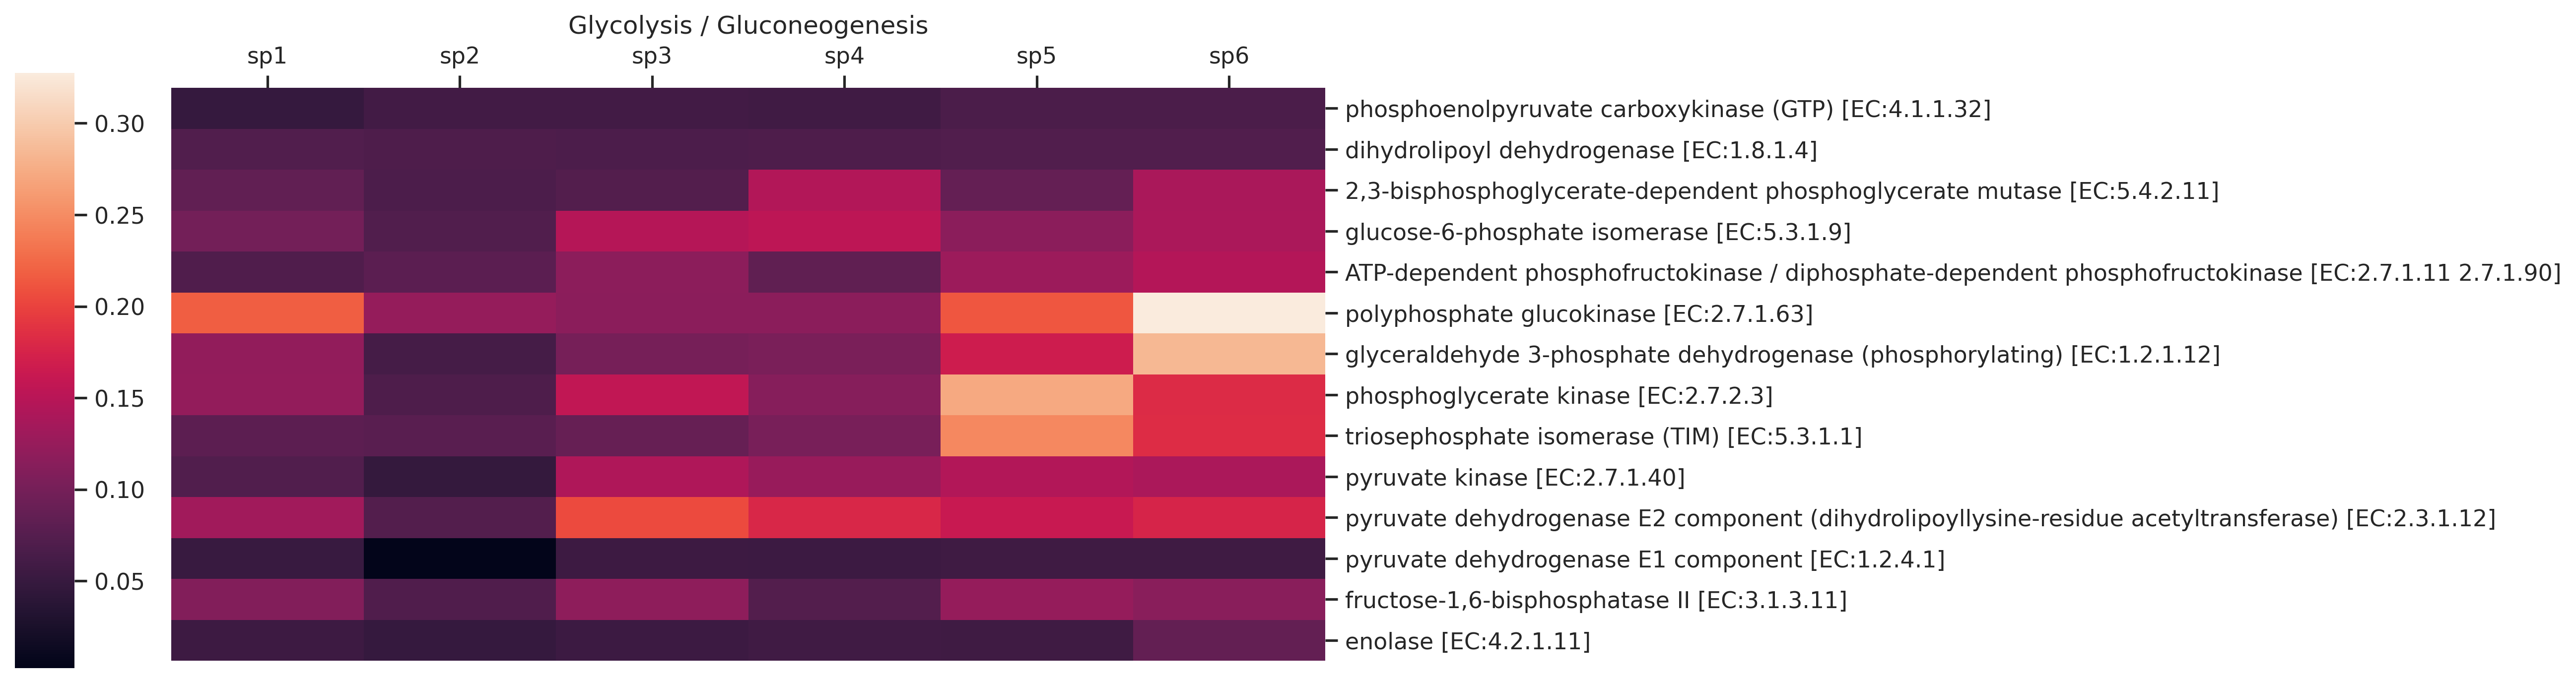

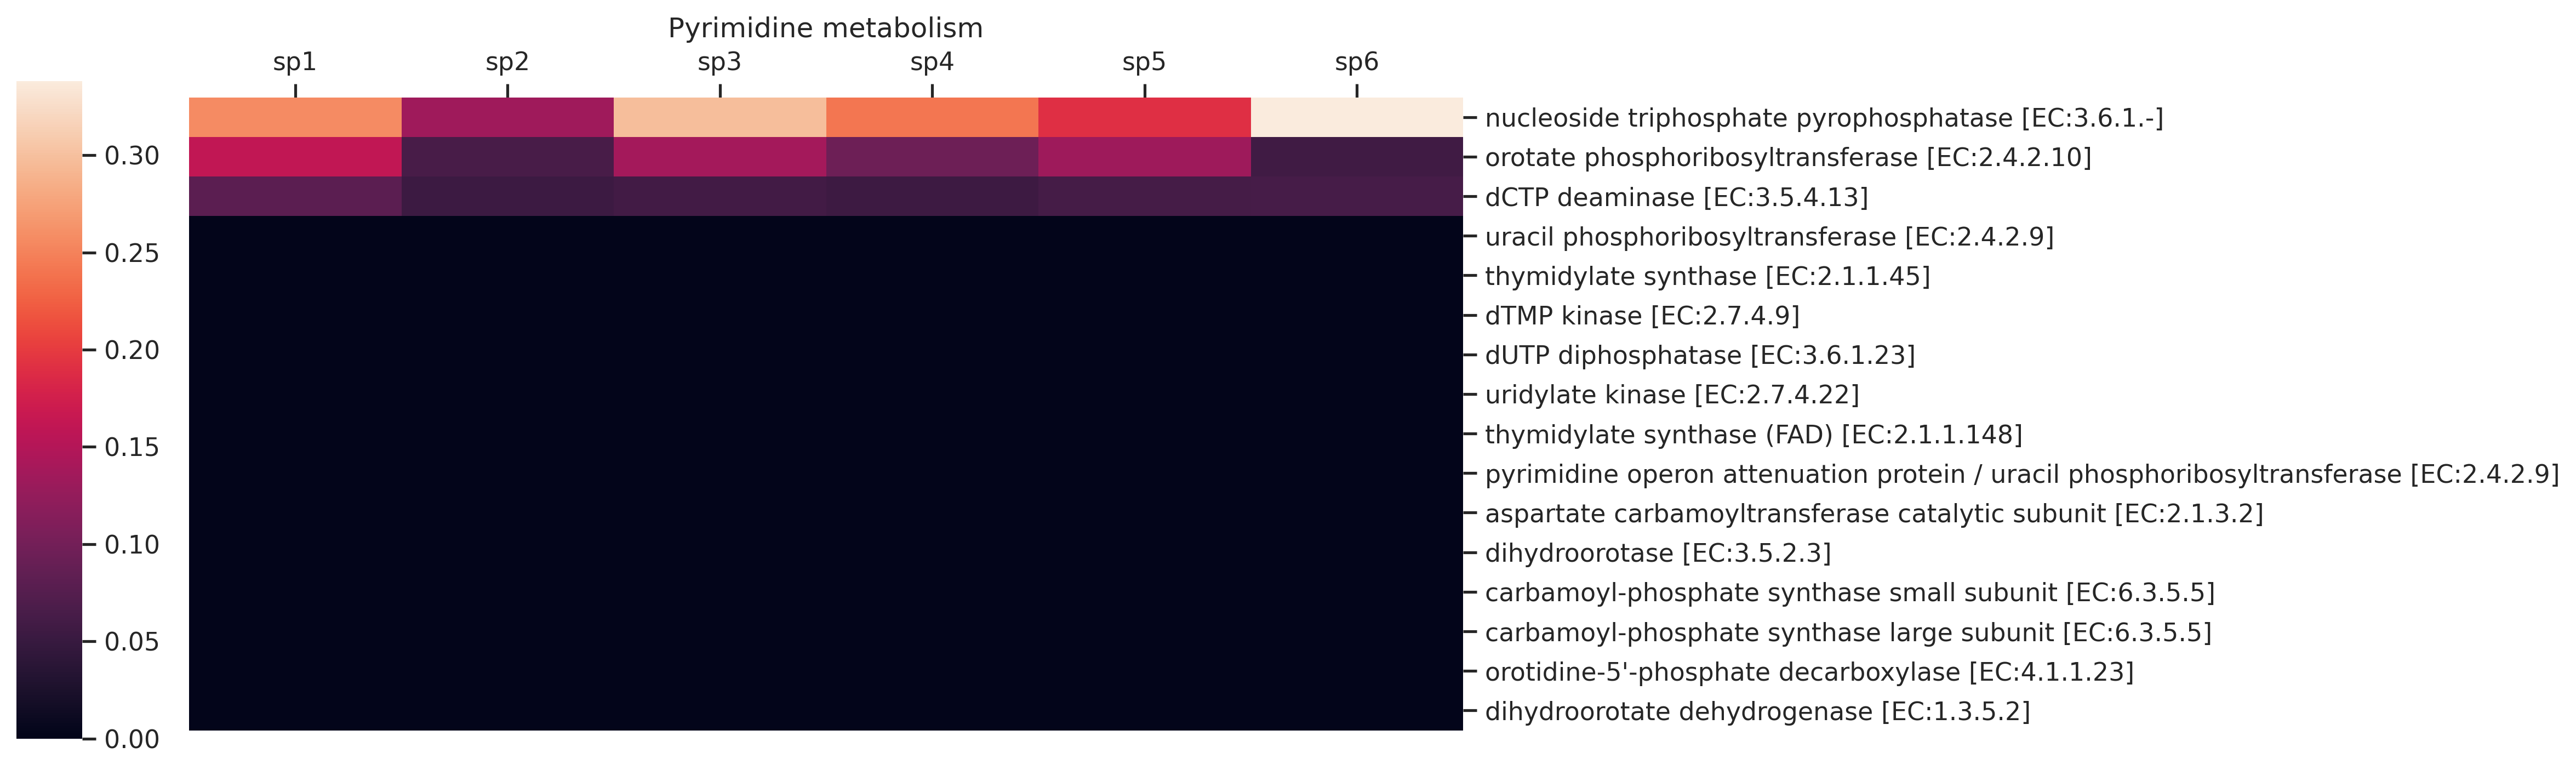

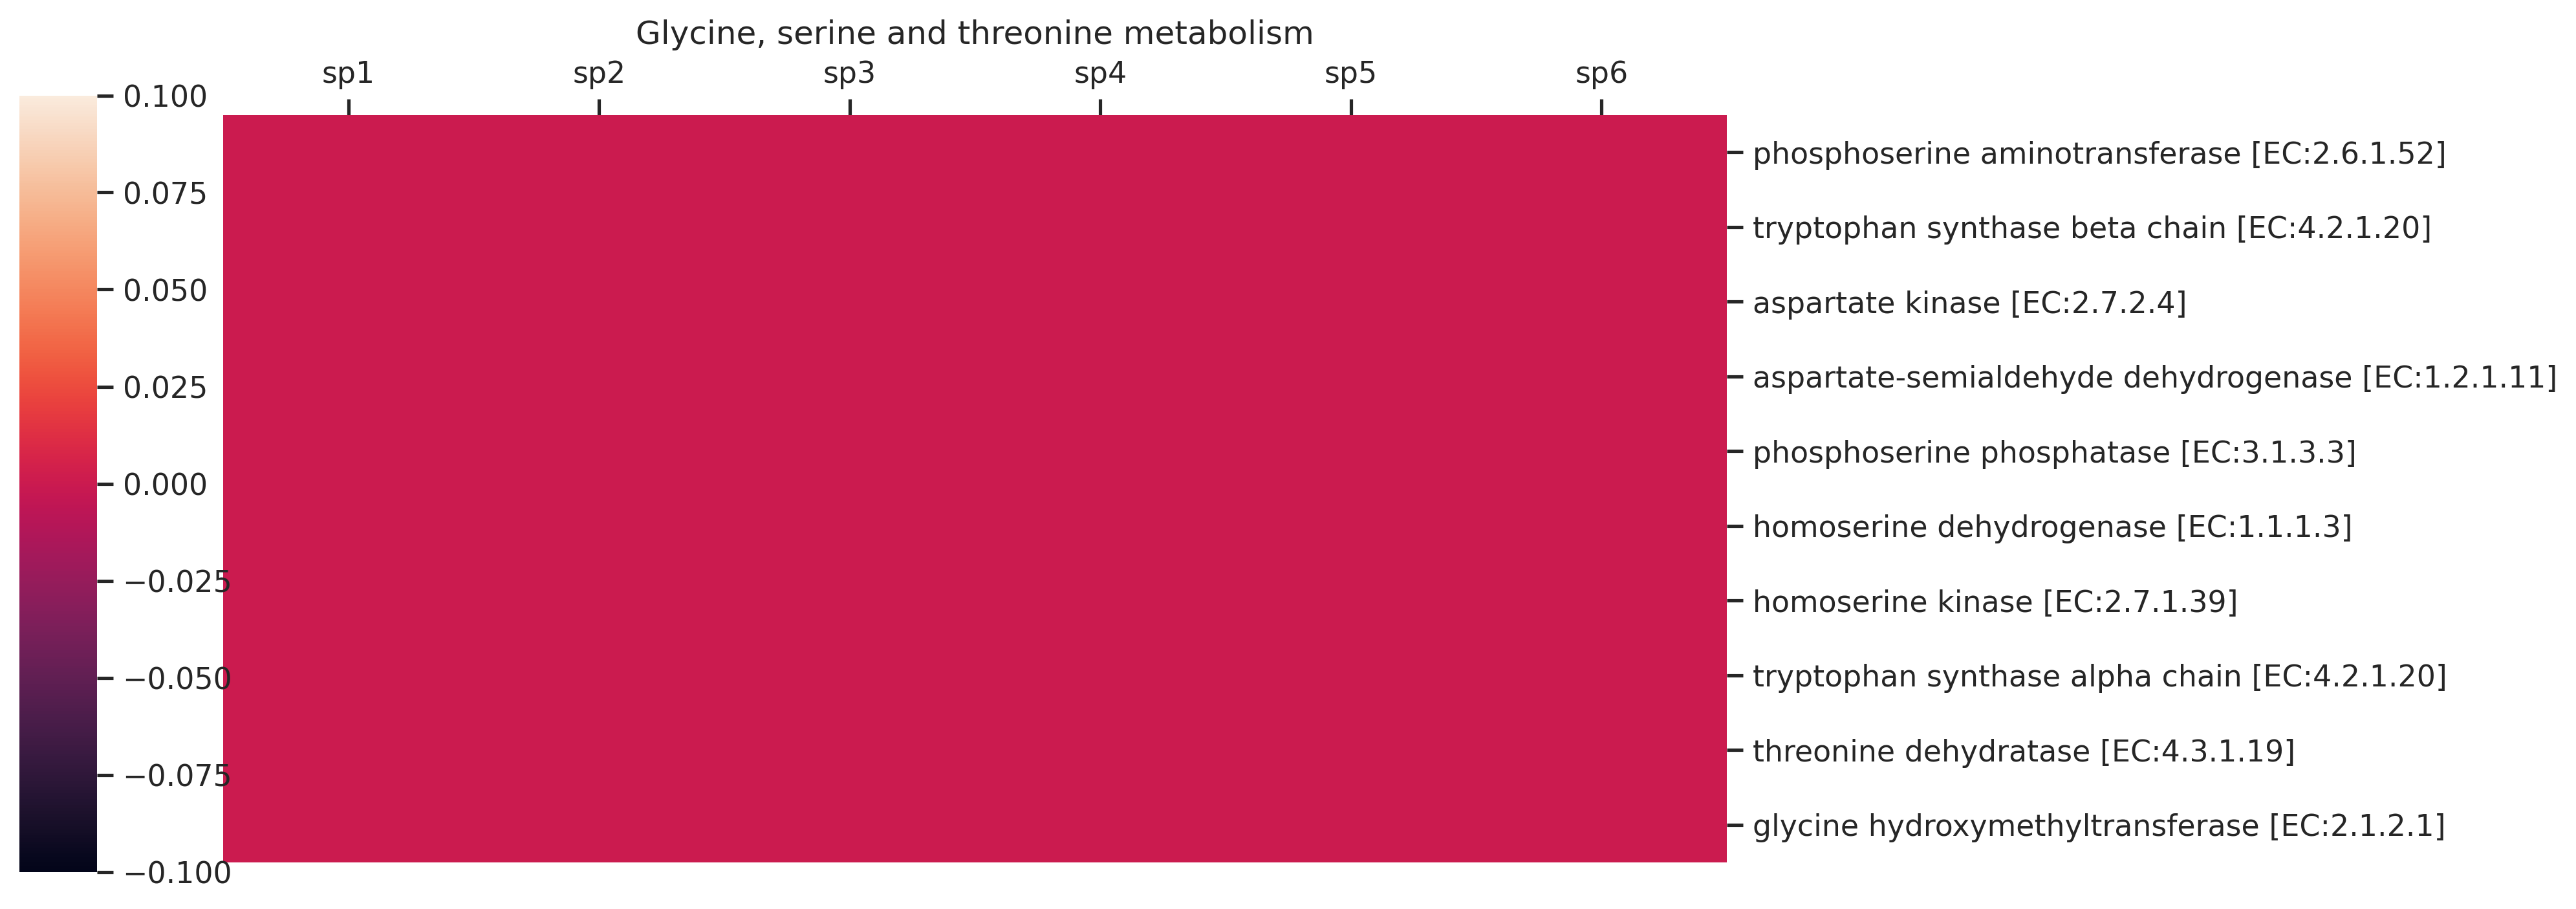

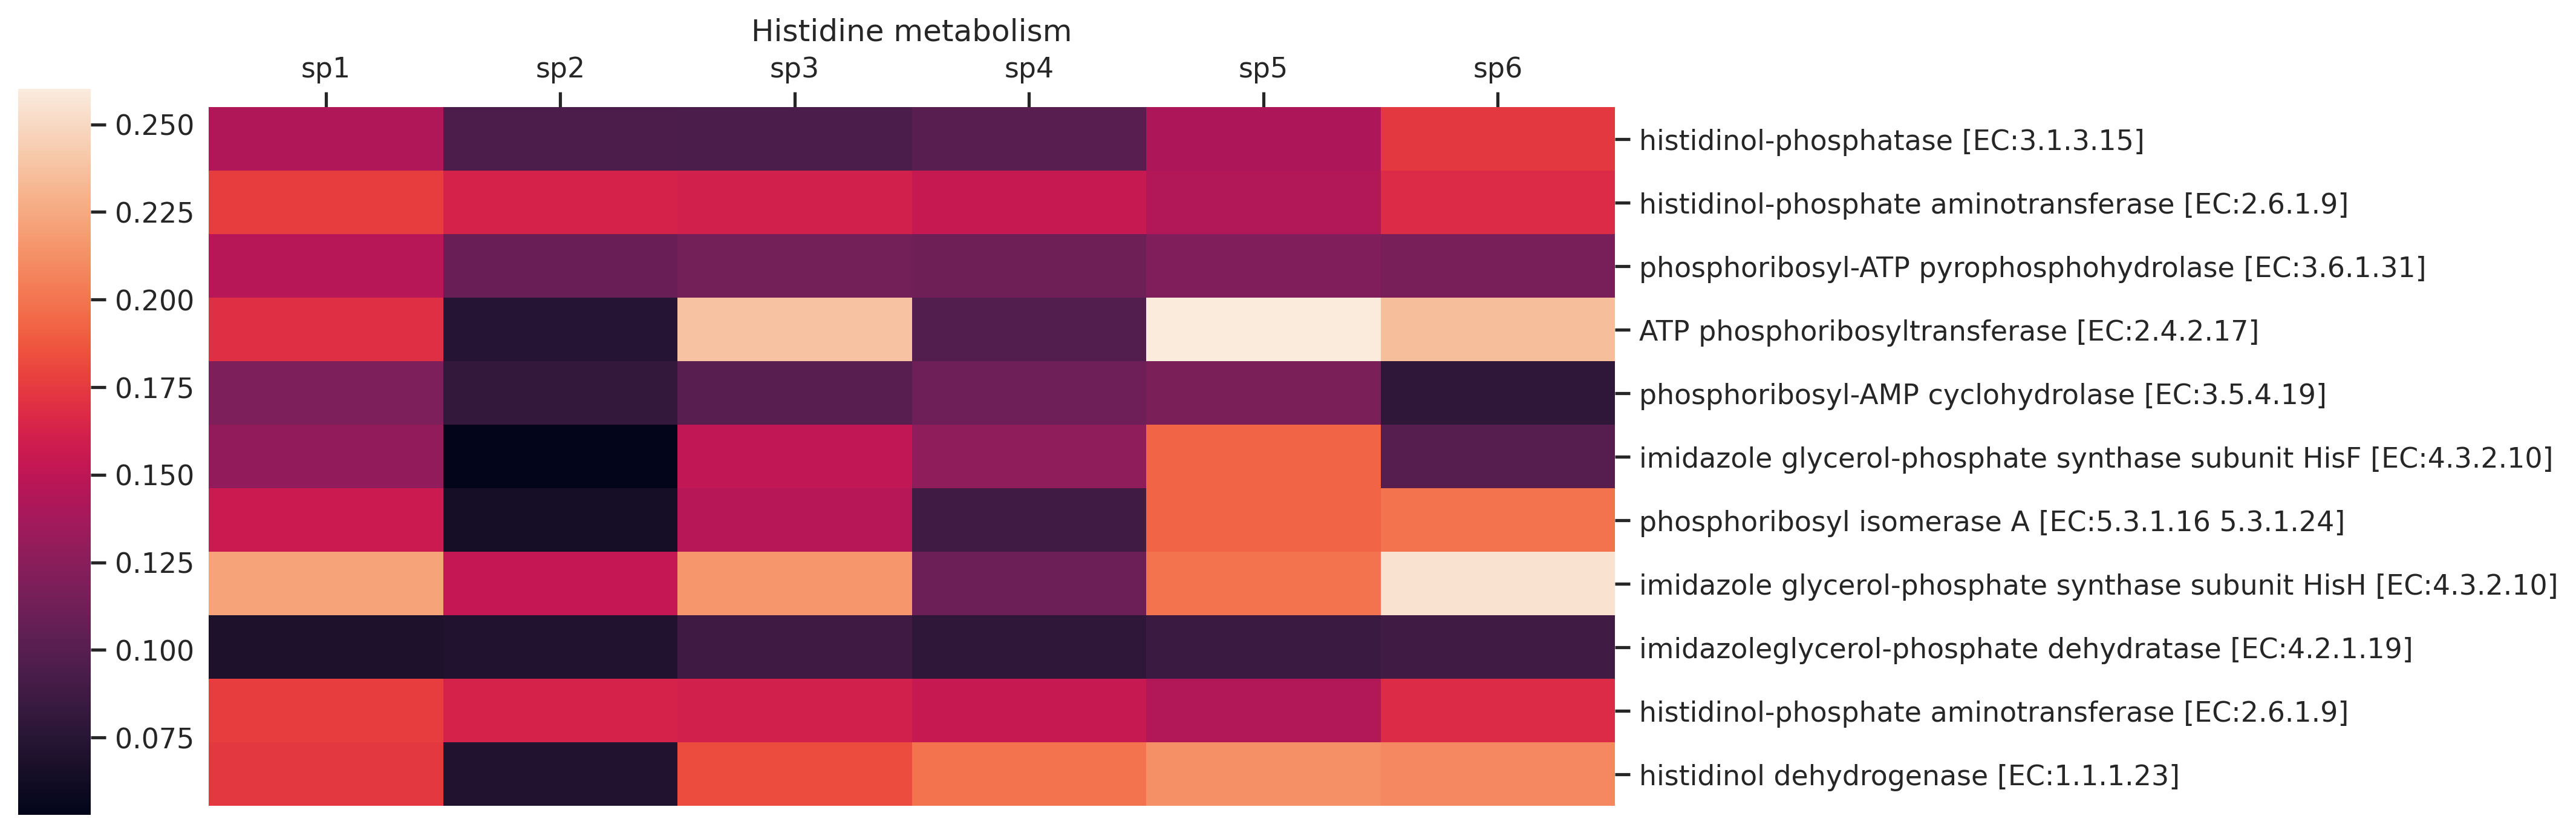

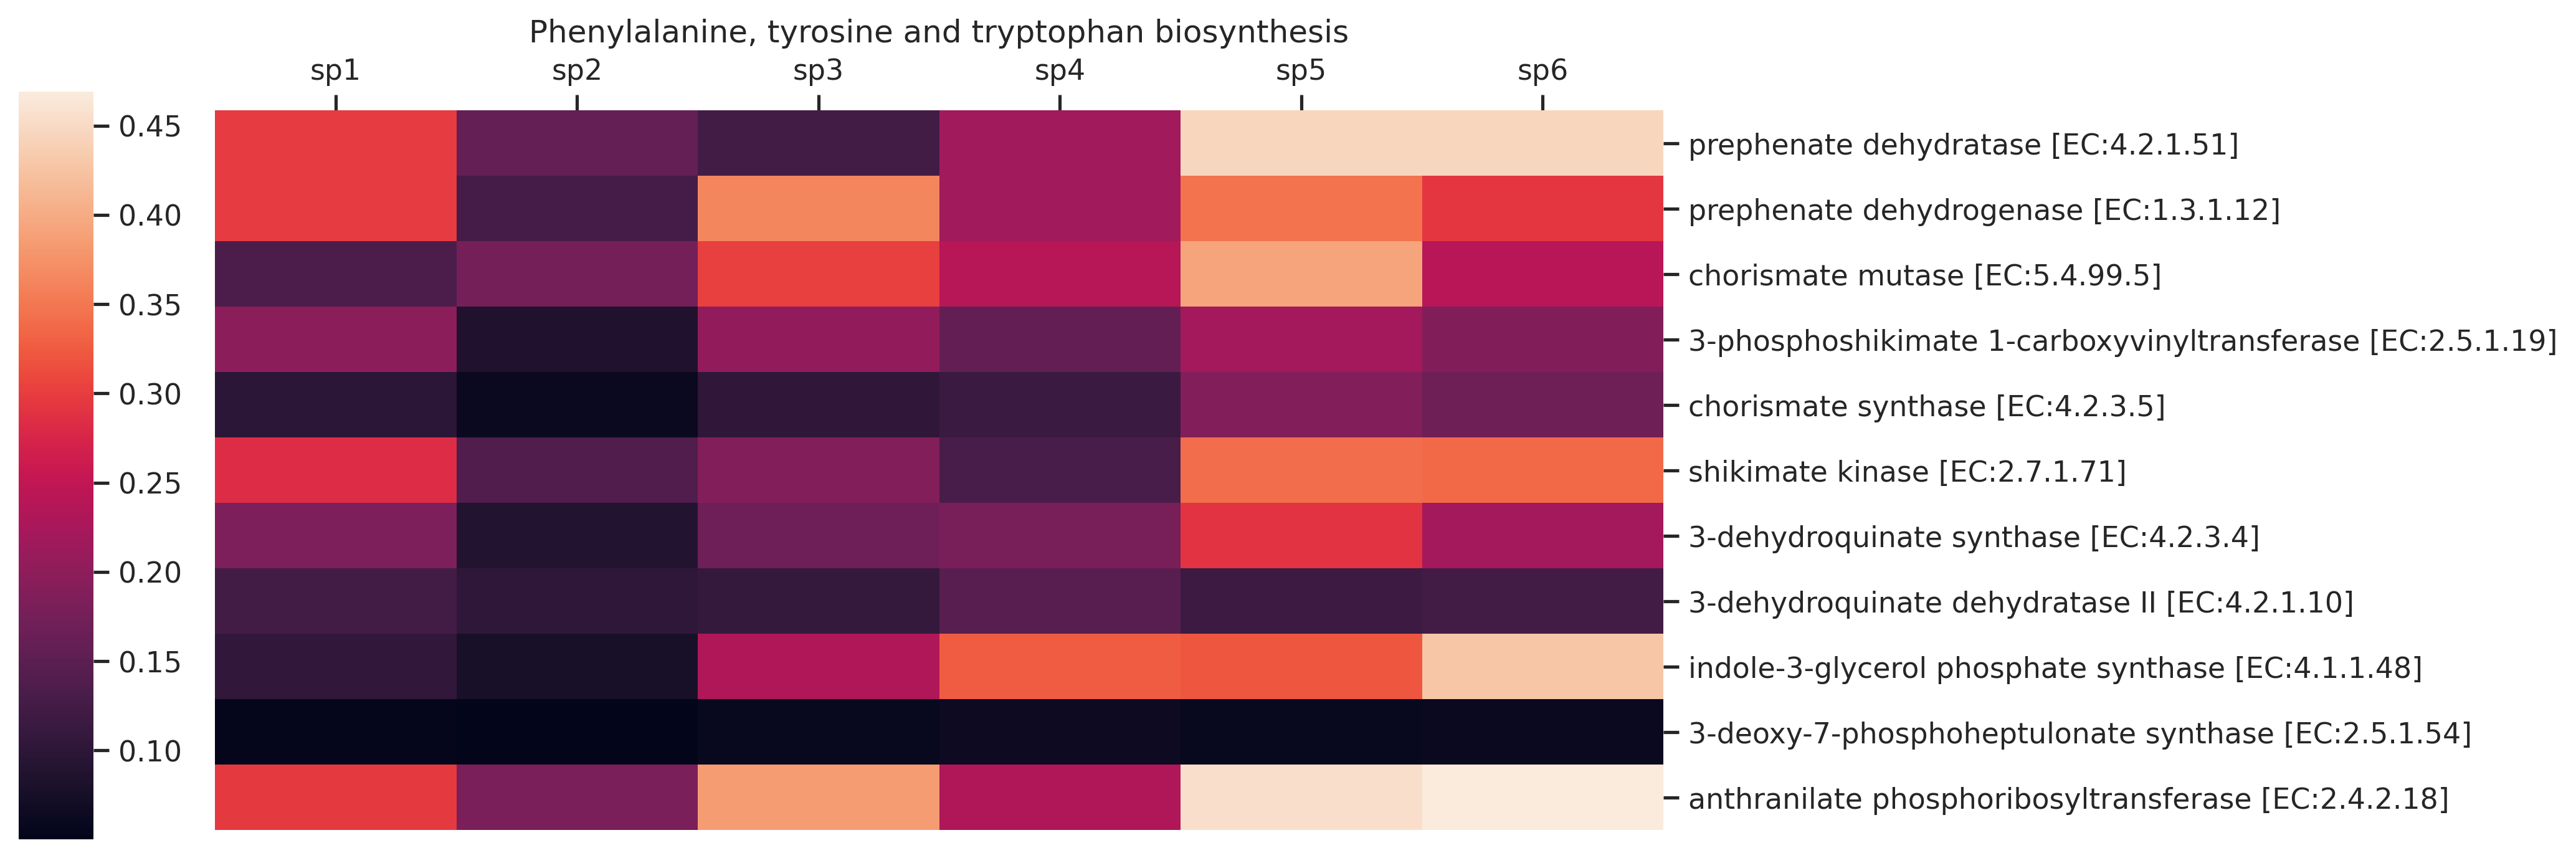

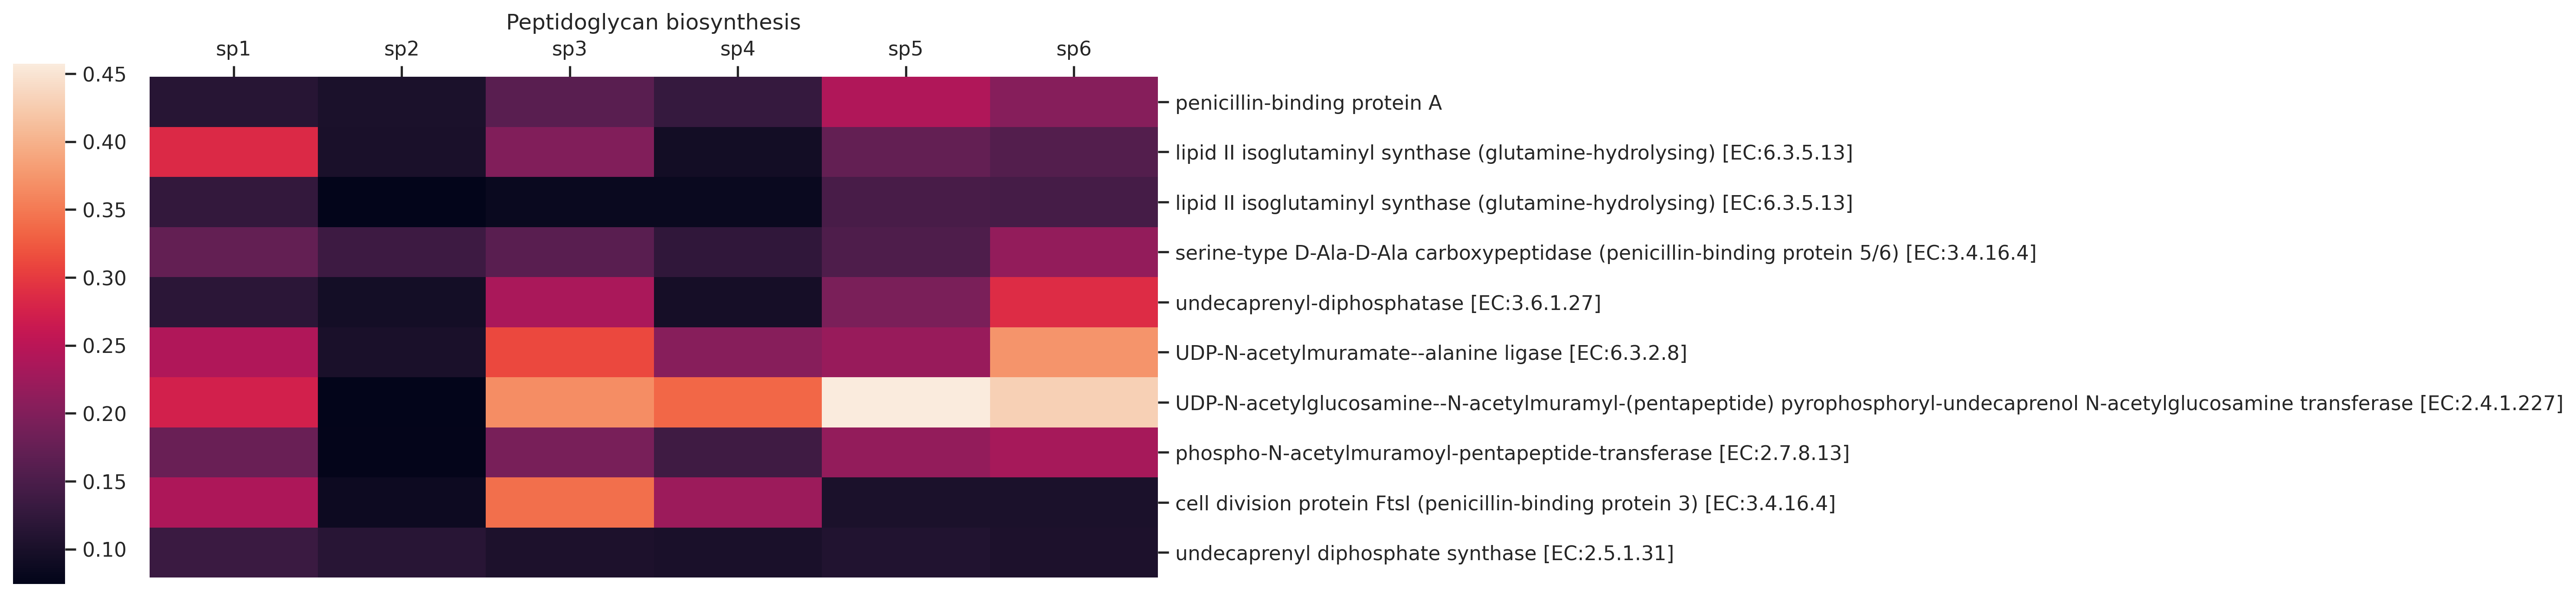

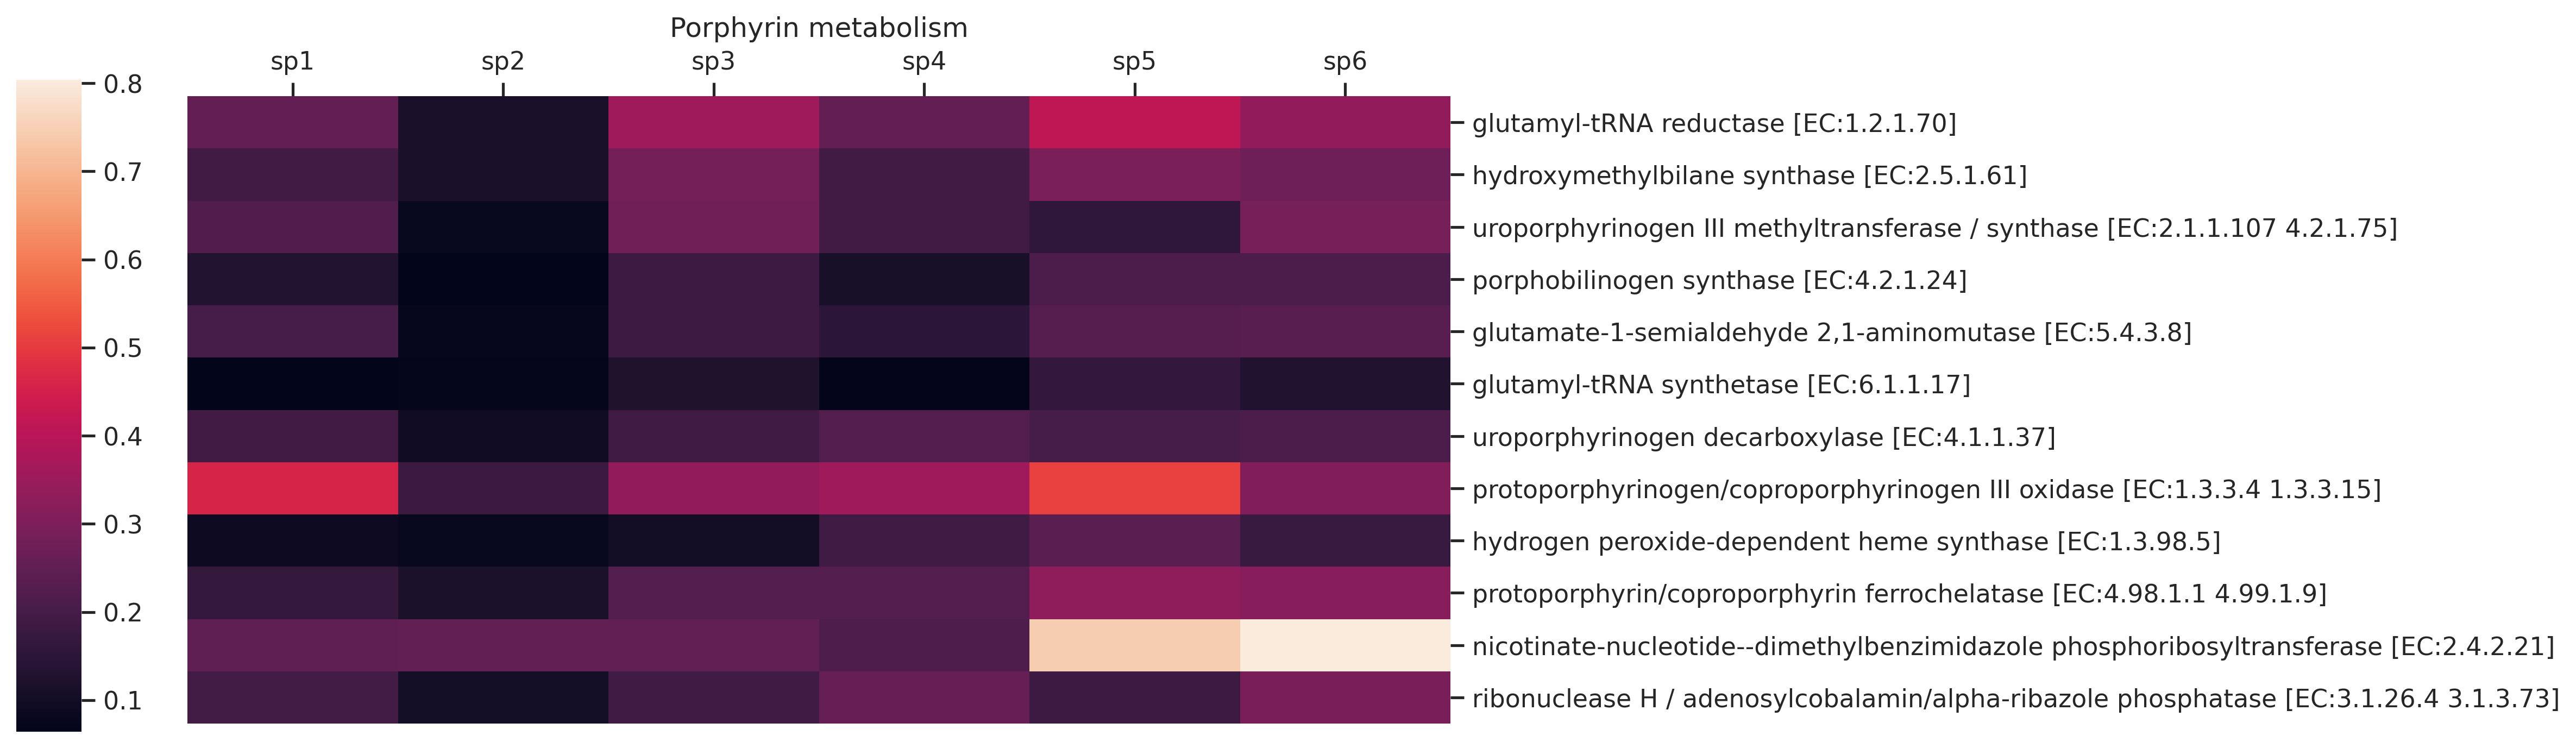

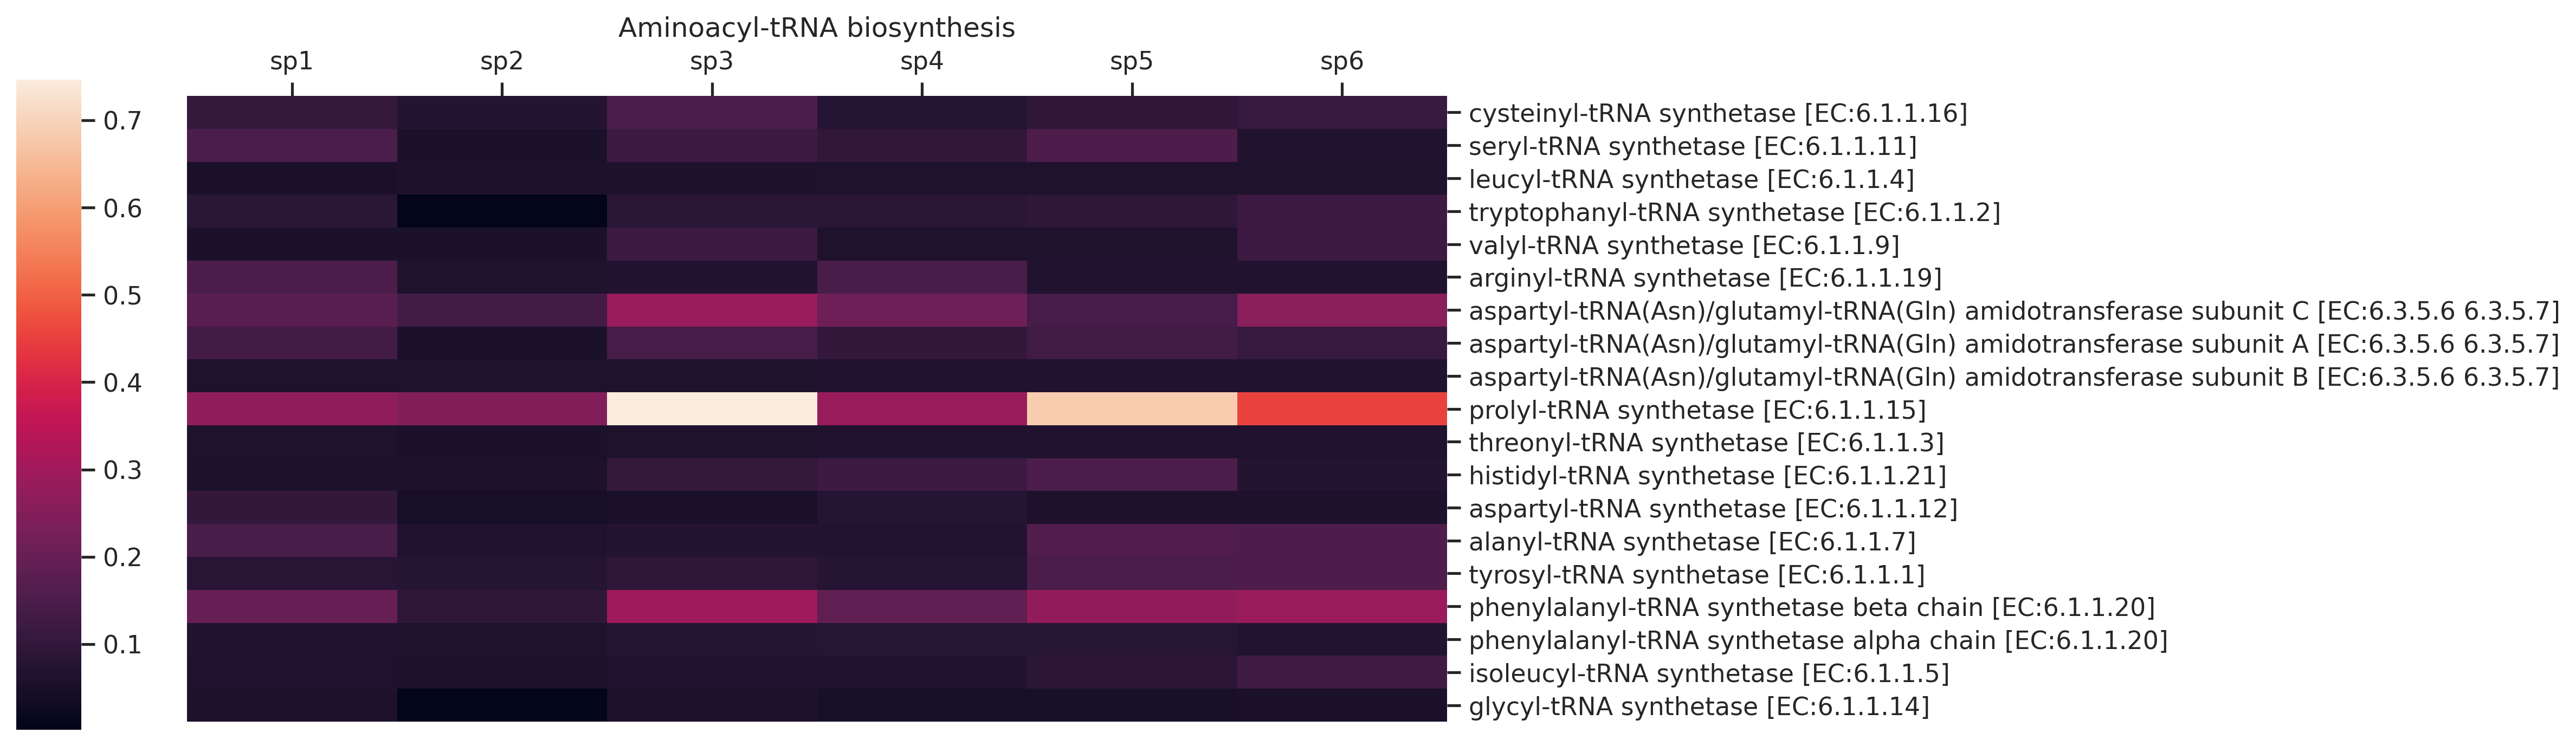

ValueError: The number of FixedLocator locations (18), usually from a call to set_ticks, does not match the number of ticklabels (52).

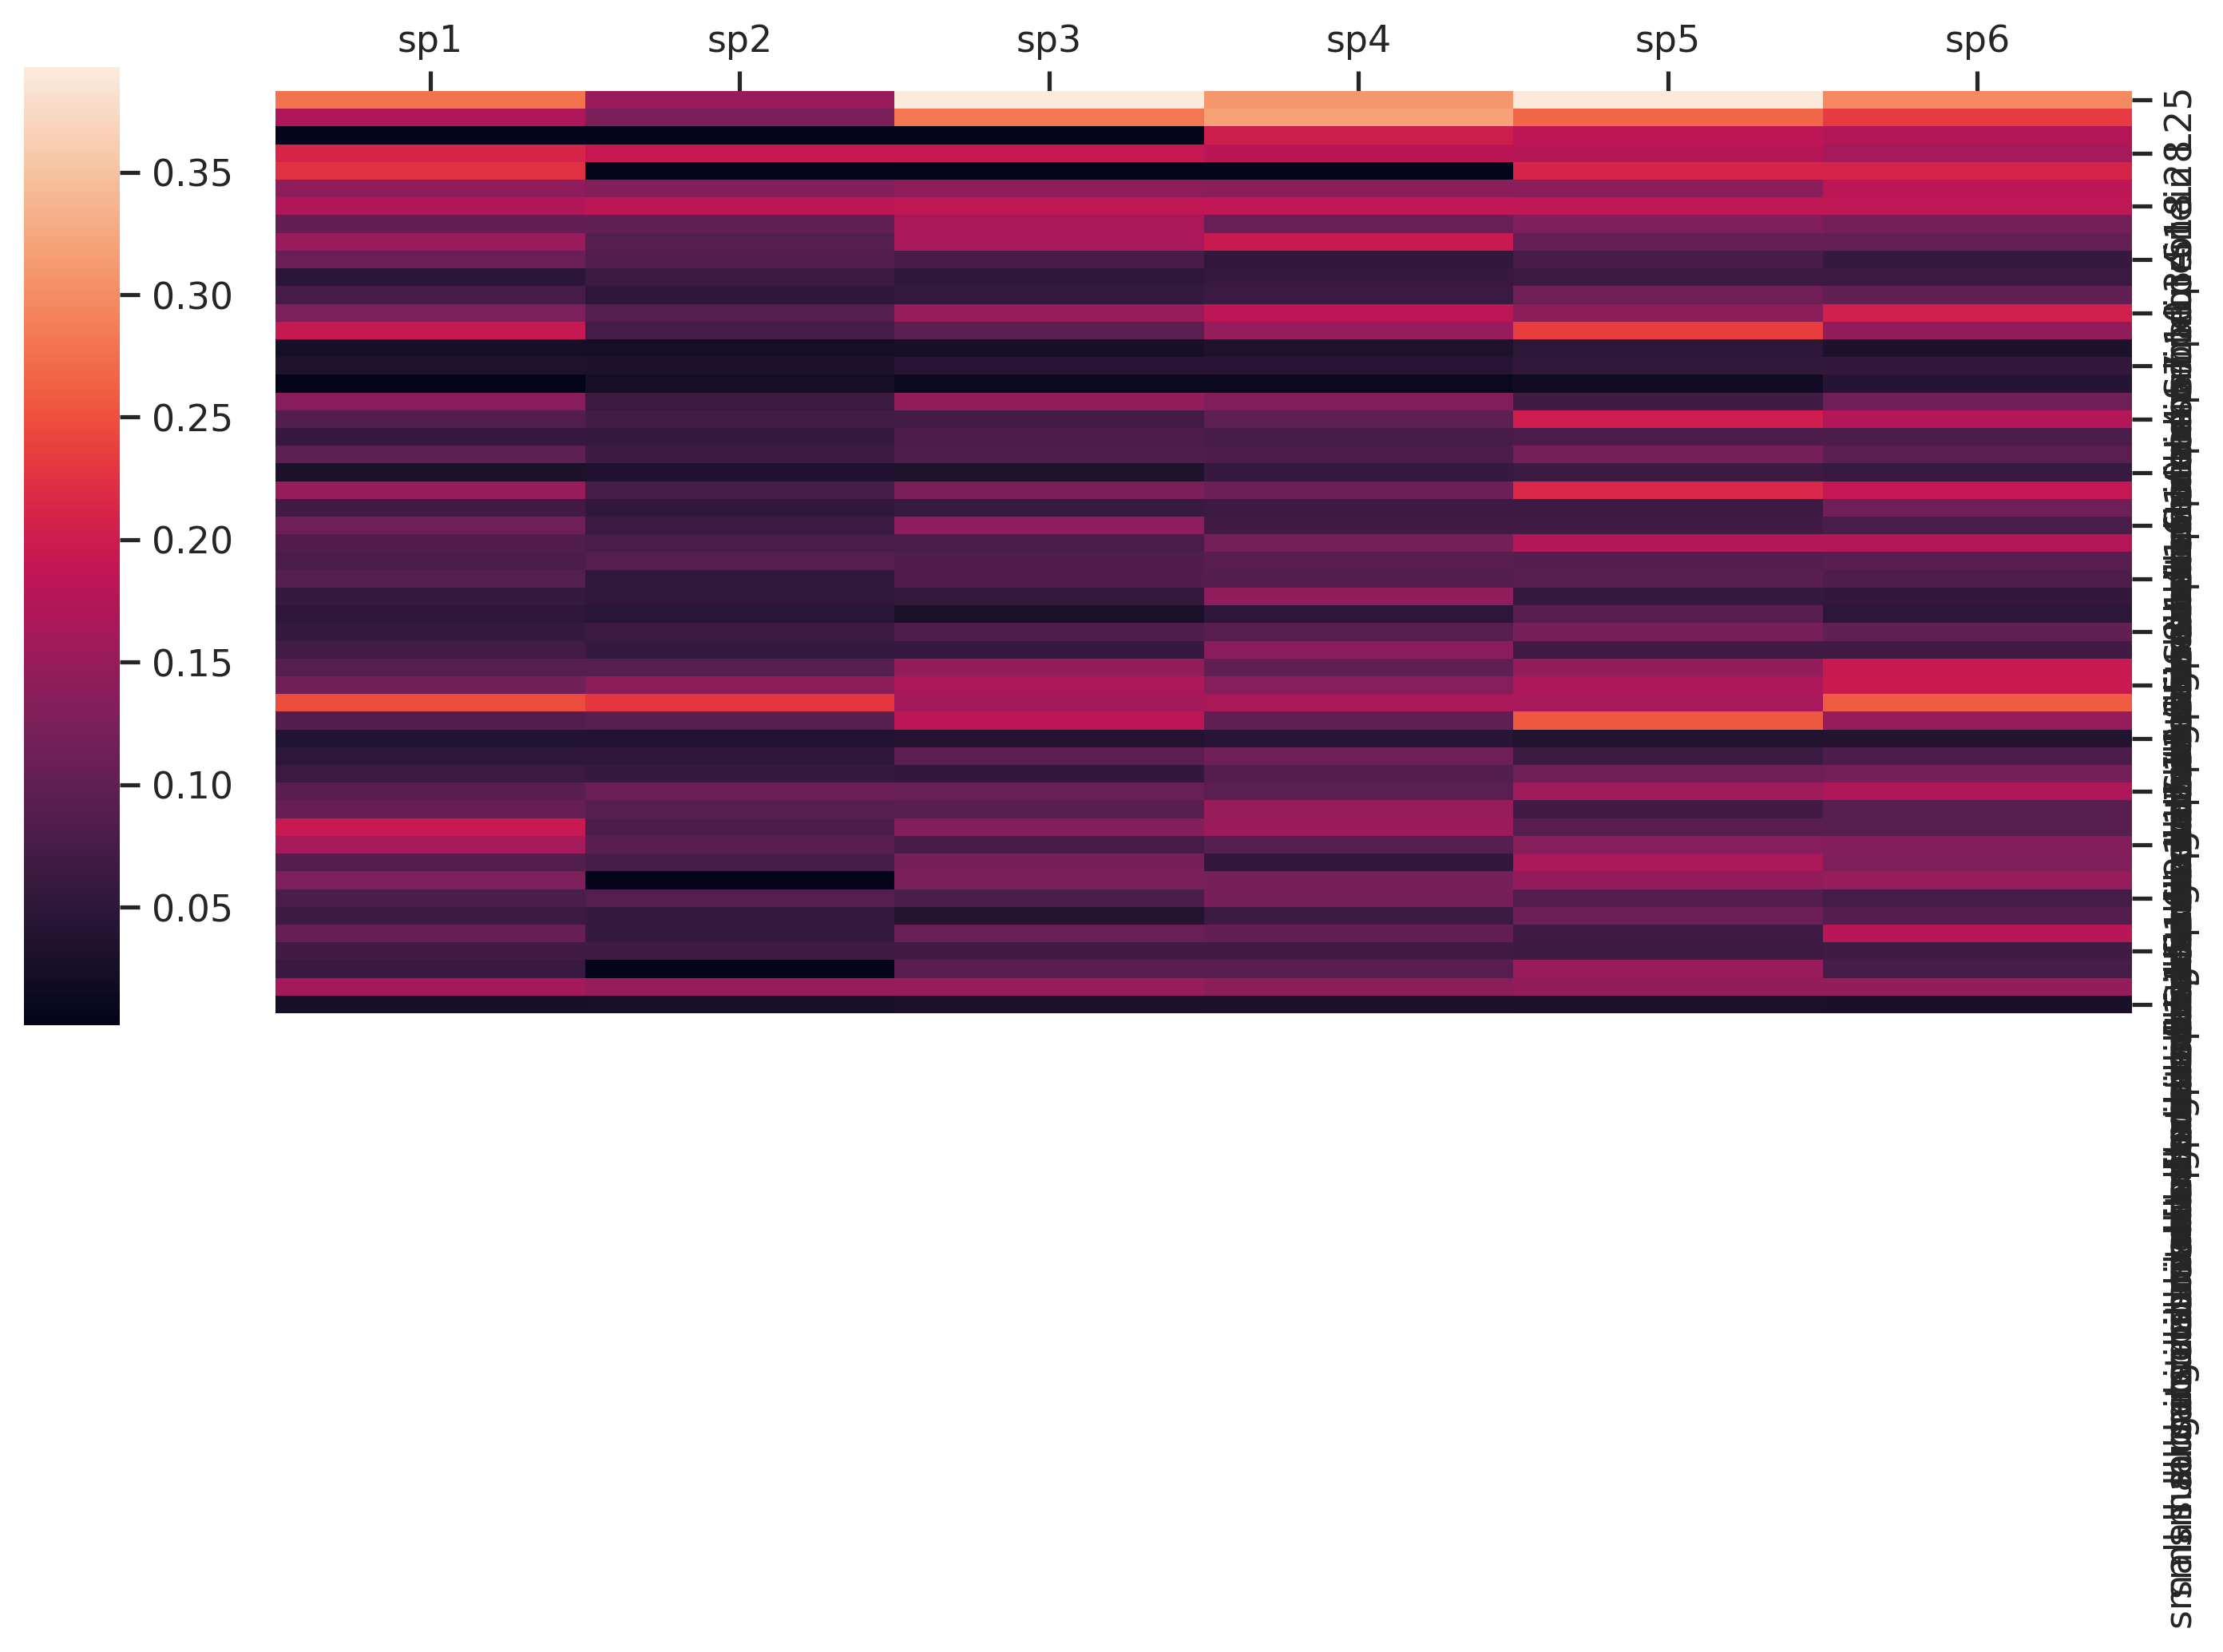

In [19]:
for pathway_full, pathway in zip(pathway_name_full_list, pathway_id_list):
    
    plot_heatmap(pathway_full, pathway)